<a href="https://colab.research.google.com/github/blessey15/Ship-Truck-Binary-Classifier/blob/main/classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd /content/gdrive/MyDrive/Binary_Classifier

/content/gdrive/MyDrive/Binary_Classifier


In [3]:
%tensorflow_version 2.x

In [4]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [5]:
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [6]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
X_test.shape

(10000, 32, 32, 3)

In [9]:
y_train.shape

(50000, 1)

In [10]:
idx = (np.logical_or(y_train==8, y_train==9)).reshape(X_train.shape[0])
print('Index Shape: {}'.format(idx.shape))
X_train = X_train[idx]
y_train= y_train[idx]
print('Filtered Images Shape: {}'.format(X_train.shape))

Index Shape: (50000,)
Filtered Images Shape: (10000, 32, 32, 3)


In [11]:
y_train[:5]

array([[9],
       [9],
       [8],
       [9],
       [9]], dtype=uint8)

In [12]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([9, 9, 8, 9, 9], dtype=uint8)

In [13]:
idx = (np.logical_or(y_test==8, y_test==9)).reshape(X_test.shape[0])
print('Index Shape: {}'.format(idx.shape))
X_test = X_test[idx]
y_test= y_test[idx]
print('Filtered Images Shape: {}'.format(X_test.shape))

Index Shape: (10000,)
Filtered Images Shape: (2000, 32, 32, 3)


In [14]:
y_test = y_test.reshape(-1,)

In [15]:
classes=["ship","truck"]
dic={8 : 'ship', 9 : 'truck'}

In [16]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    if y[index]==8:
      i=0
    else:
      i=1  
    plt.xlabel(classes[i])

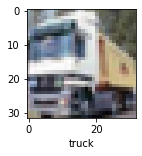

In [17]:
plot_sample(X_train, y_train, 0)

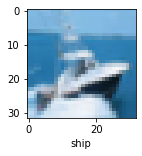

In [18]:
plot_sample(X_train, y_train, 2)

In [19]:
idx = (np.logical_or(y_test==8, y_test==9)).reshape(X_test.shape[0])
print('Index Shape: {}'.format(idx.shape))
X_test = X_test[idx]
y_test= y_test[idx]
print('Filtered Images Shape: {}'.format(X_test.shape))

Index Shape: (2000,)
Filtered Images Shape: (2000, 32, 32, 3)


In [20]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [21]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [22]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
313/313 [==============================] - 14s 41ms/step - loss: 0.4297 - accuracy: 0.8066
Epoch 2/10
313/313 [==============================] - 13s 41ms/step - loss: 0.2647 - accuracy: 0.8933
Epoch 3/10
313/313 [==============================] - 13s 40ms/step - loss: 0.2224 - accuracy: 0.9106
Epoch 4/10
313/313 [==============================] - 13s 41ms/step - loss: 0.1933 - accuracy: 0.9247
Epoch 5/10
313/313 [==============================] - 13s 41ms/step - loss: 0.1750 - accuracy: 0.9300
Epoch 6/10
313/313 [==============================] - 13s 41ms/step - loss: 0.1550 - accuracy: 0.9400
Epoch 7/10
313/313 [==============================] - 13s 41ms/step - loss: 0.1524 - accuracy: 0.9387
Epoch 8/10
313/313 [==============================] - 13s 40ms/step - loss: 0.1312 - accuracy: 0.9500
Epoch 9/10
313/313 [==============================] - 13s 40ms/step - loss: 0.1225 - accuracy: 0.9507
Epoch 10/10
313/313 [==============================] - 13s 40ms/step - loss: 0.110

In [24]:
cnn.evaluate(X_test,y_test)

63/63 [==============================] - 1s 12ms/step - loss: 0.1708 - accuracy: 0.9355


[0.17080016434192657, 0.9355000257492065]

In [25]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.13678155e-07, 2.91564834e-08, 6.08864852e-08, 3.74162532e-08,
        7.75236160e-08, 5.68814009e-08, 2.02425667e-07, 6.09051867e-08,
        9.94200706e-01, 5.79877244e-03],
       [1.44401827e-06, 9.53055292e-07, 1.81682367e-06, 7.36840548e-07,
        1.20389723e-06, 1.12907082e-06, 2.86297904e-06, 8.32861360e-07,
        9.14936662e-01, 8.50523263e-02],
       [1.09979366e-10, 5.79322090e-10, 2.32880626e-09, 1.15007927e-10,
        4.24896562e-10, 1.52174010e-10, 6.12395135e-10, 2.60237734e-11,
        6.38236990e-04, 9.99361813e-01],
       [5.32087308e-09, 9.28190058e-09, 2.69244396e-08, 2.49524668e-09,
        1.50478616e-08, 2.05089434e-09, 1.94202645e-08, 1.36493206e-09,
        8.56593996e-02, 9.14340496e-01],
       [1.42019360e-07, 5.19670280e-08, 1.12497304e-07, 6.38330633e-08,
        1.69810150e-07, 5.65020670e-08, 2.56539465e-07, 1.16989732e-07,
        9.97263908e-01, 2.73515843e-03]], dtype=float32)

In [26]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[8, 8, 9, 9, 8]

In [27]:
y_test[:5]

array([8, 8, 9, 9, 8], dtype=uint8)

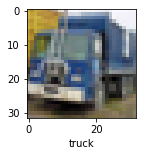

In [28]:
plot_sample(X_test, y_test,3)

In [29]:
dic[y_classes[3]]

'truck'

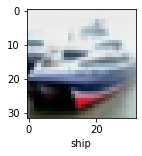

In [31]:
plot_sample(X_test, y_test,0)

In [32]:
dic[y_classes[0]]

'ship'

In [30]:
cnn.save('model.h5')
